In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns",None)


In [2]:
dp = pd.read_csv("Fuel Consumption Ratings 2023.csv", encoding='latin-1')

In [3]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

In [4]:
dp.describe()

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [5]:
dp.head(5)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


In [6]:
dp.tail(4)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
852,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,Smog rating,the tailpipe emissions of smog-forming polluta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dp.isnull().sum()

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

In [8]:
dp.isna().sum()

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

In [9]:
dp = dp[~dp["Smog Rating"].isnull()]

In [10]:
dp.isna().sum()

Year                          0
Make                          0
Model                         0
Vehicle Class                 0
Engine Size (L)               0
Cylinders                     0
Transmission                  0
Fuel Type                     0
Fuel Consumption (L/100Km)    0
Hwy (L/100 km)                0
Comb (L/100 km)               0
Comb (mpg)                    0
CO2 Emissions (g/km)          0
CO2 Rating                    0
Smog Rating                   0
dtype: int64

In [11]:
dp.drop_duplicates()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.2,7.9,9.2,31.0,215.0,5.0,5.0
829,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,8.2,9.4,30.0,218.0,5.0,5.0
830,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.1,8.7,10.0,28.0,233.0,5.0,7.0
831,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4.0,AS8,Z,10.5,8.4,9.6,29.0,223.0,5.0,5.0


In [12]:
dp.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [13]:
dp.shape

(833, 15)

In [14]:
dp.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [15]:
dp.isna().sum()

Year                          0
Make                          0
Model                         0
Vehicle Class                 0
Engine Size (L)               0
Cylinders                     0
Transmission                  0
Fuel Type                     0
Fuel Consumption (L/100Km)    0
Hwy (L/100 km)                0
Comb (L/100 km)               0
Comb (mpg)                    0
CO2 Emissions (g/km)          0
CO2 Rating                    0
Smog Rating                   0
dtype: int64

In [16]:
dp.Make.value_counts()

Ford             93
Chevrolet        55
Mercedes-Benz    54
BMW              51
Toyota           46
Audi             44
GMC              36
Jeep             30
Nissan           27
Lexus            26
Cadillac         26
MINI             25
Dodge            23
Hyundai          23
Kia              23
Honda            22
Mazda            21
Land Rover       21
Volkswagen       19
Maserati         17
Subaru           17
Jaguar           12
Volvo            12
Ram              11
Acura            10
Genesis           9
Bentley           9
Lincoln           8
Alfa Romeo        7
Chrysler          7
Mitsubishi        7
Rolls-Royce       7
Aston Martin      7
Lamborghini       6
Infiniti          6
Buick             6
Porsche           6
Bugatti           3
FIAT              1
Name: Make, dtype: int64

In [17]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        833 non-null    object 
 1   Make                        833 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

Ford             93
Chevrolet        55
Mercedes-Benz    54
BMW              51
Toyota           46
Audi             44
GMC              36
Jeep             30
Nissan           27
Lexus            26
Cadillac         26
MINI             25
Dodge            23
Hyundai          23
Kia              23
Honda            22
Mazda            21
Land Rover       21
Volkswagen       19
Maserati         17
Subaru           17
Jaguar           12
Volvo            12
Ram              11
Acura            10
Genesis           9
Bentley           9
Lincoln           8
Alfa Romeo        7
Chrysler          7
Mitsubishi        7
Rolls-Royce       7
Aston Martin      7
Lamborghini       6
Infiniti          6
Buick             6
Porsche           6
Bugatti           3
FIAT              1
Name: Make, dtype: int64


<Axes: xlabel='Make', ylabel='Count'>

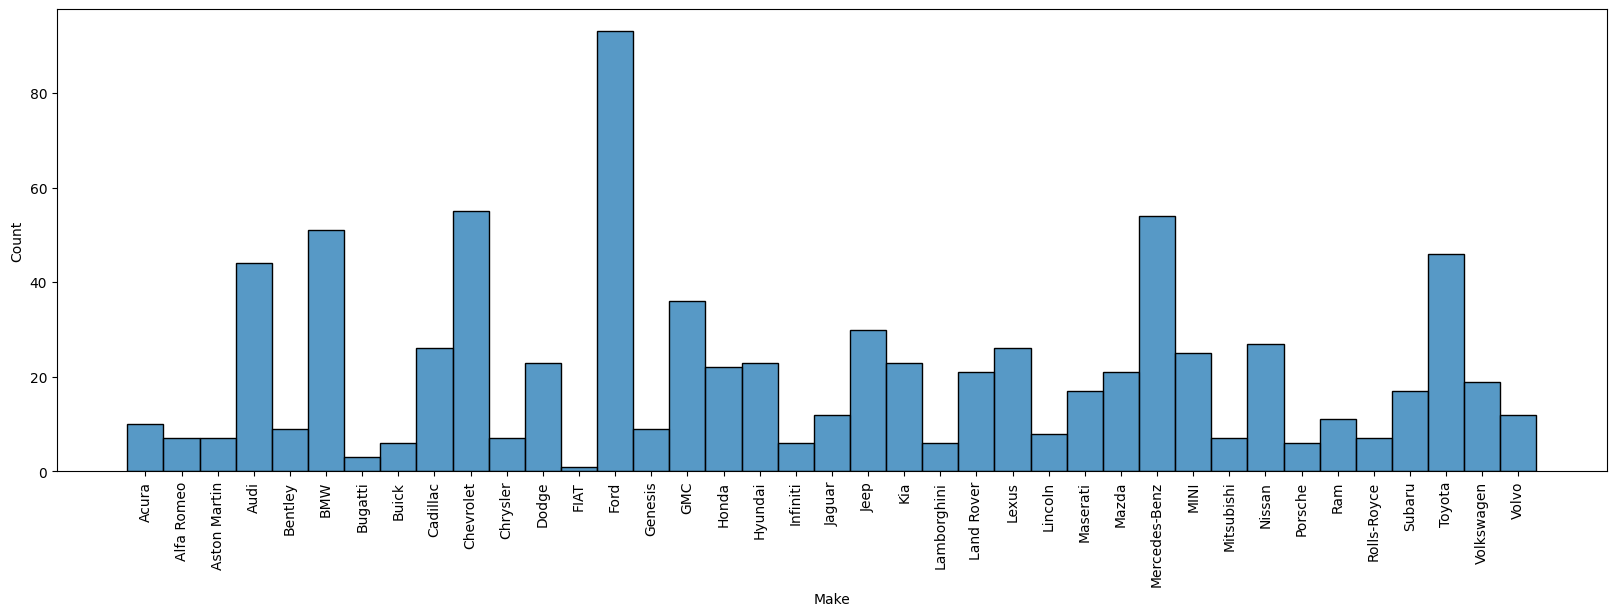

In [18]:
print(dp["Make"].value_counts())
plt.figure(figsize = (20,6))
plt.xticks(rotation = 90)
sns.histplot(dp["Make"])

In [19]:
dp.head(4)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0


Ford             93
Chevrolet        55
Mercedes-Benz    54
BMW              51
Toyota           46
Audi             44
GMC              36
Jeep             30
Nissan           27
Lexus            26
Cadillac         26
MINI             25
Dodge            23
Hyundai          23
Kia              23
Honda            22
Mazda            21
Land Rover       21
Volkswagen       19
Maserati         17
Subaru           17
Jaguar           12
Volvo            12
Ram              11
Acura            10
Genesis           9
Bentley           9
Lincoln           8
Alfa Romeo        7
Chrysler          7
Mitsubishi        7
Rolls-Royce       7
Aston Martin      7
Lamborghini       6
Infiniti          6
Buick             6
Porsche           6
Bugatti           3
FIAT              1
Name: Make, dtype: int64


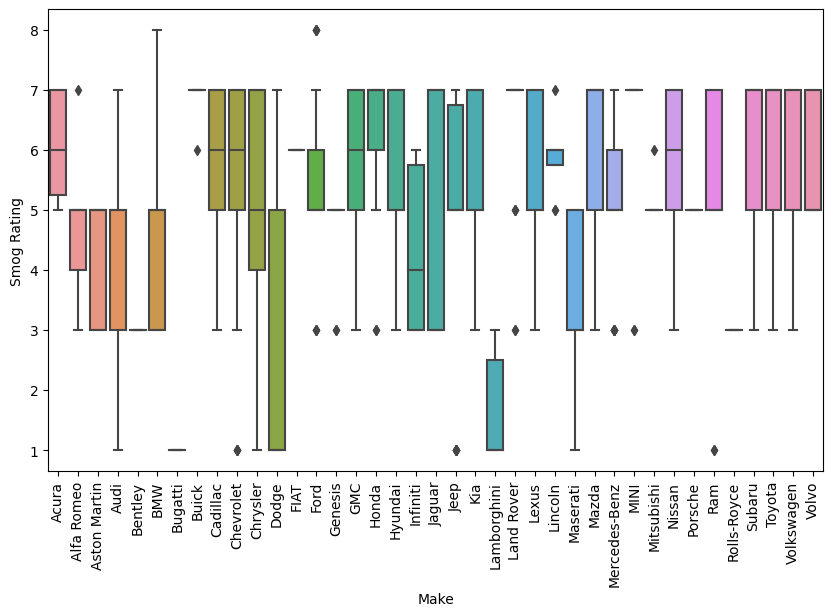

In [20]:
print(dp["Make"].value_counts())
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.boxplot(x = dp["Make"], y = dp["Smog Rating"])
plt.show()

In [21]:
dp.head(4)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0


In [22]:
dp["Vehicle Class"].value_counts()

SUV: Small                 195
SUV: Standard              135
Mid-size                   112
Pickup truck: Standard      97
Subcompact                  75
Compact                     62
Full-size                   48
Two-seater                  35
Minicompact                 22
Pickup truck: Small         17
Station wagon: Small        14
Station wagon: Mid-size      9
Minivan                      7
Special purpose vehicle      5
Name: Vehicle Class, dtype: int64

SUV: Small                 195
SUV: Standard              135
Mid-size                   112
Pickup truck: Standard      97
Subcompact                  75
Compact                     62
Full-size                   48
Two-seater                  35
Minicompact                 22
Pickup truck: Small         17
Station wagon: Small        14
Station wagon: Mid-size      9
Minivan                      7
Special purpose vehicle      5
Name: Vehicle Class, dtype: int64


<Axes: xlabel='Vehicle Class', ylabel='Count'>

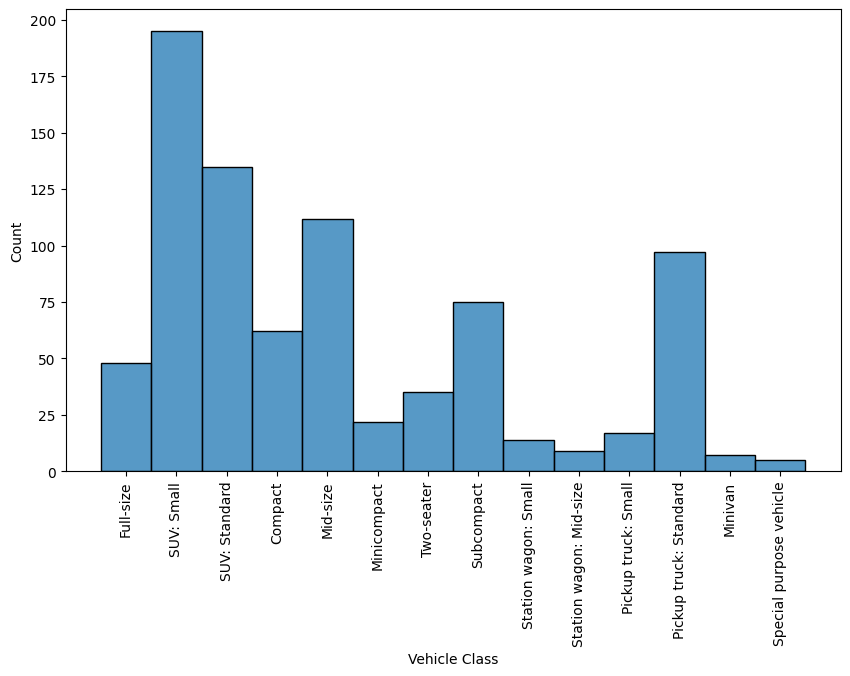

In [23]:
print(dp["Vehicle Class"].value_counts())
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.histplot(dp["Vehicle Class"])

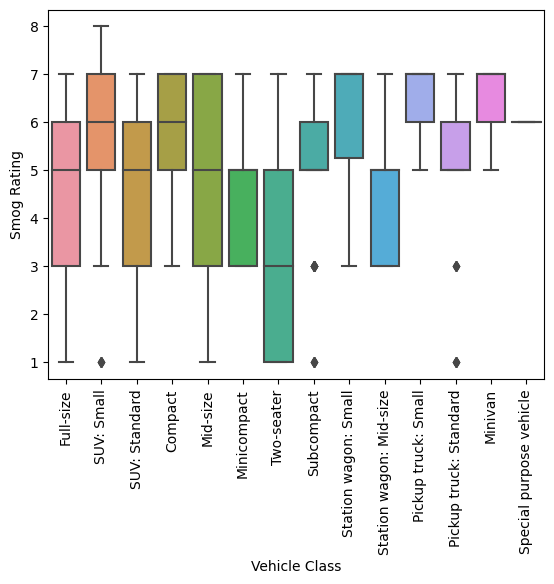

<Figure size 1000x600 with 0 Axes>

In [24]:
sns.boxplot(x = dp["Vehicle Class"], y = dp['Smog Rating'])
plt.xticks(rotation = 90)
plt.figure(figsize = (10,6))
plt.show()

In [25]:
dp.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [26]:
dp.head(3)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0


2.0    193
3.0    124
2.5     63
3.5     46
1.5     36
3.6     36
4.0     34
5.0     30
2.7     30
6.2     26
5.3     26
2.3     25
4.4     22
1.6     21
2.4     18
5.7     13
5.2     13
3.8     10
6.4     10
3.3      9
3.4      8
1.3      7
6.7      7
2.9      6
6.0      5
1.2      4
1.8      3
8.0      3
5.6      2
5.5      2
4.6      1
Name: Engine Size (L), dtype: int64


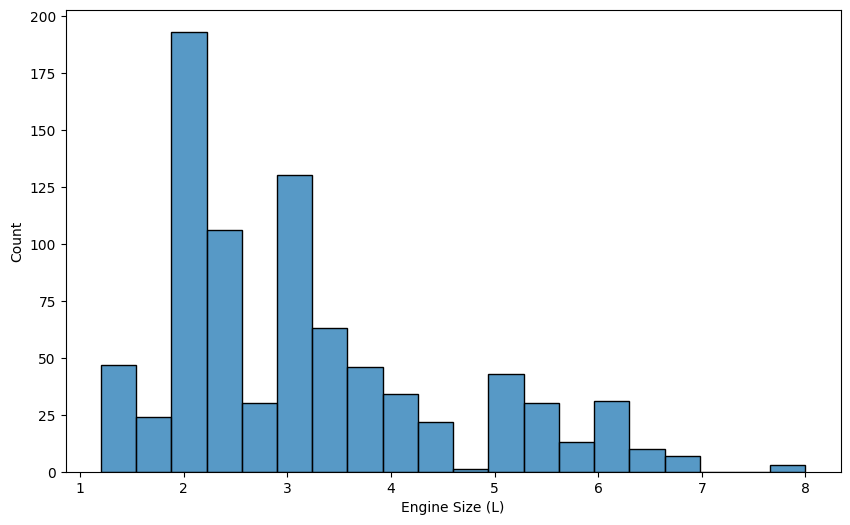

In [27]:
print(dp['Engine Size (L)'].value_counts())
plt.figure(figsize = (10,6))
sns.histplot(dp["Engine Size (L)"])
plt.show()

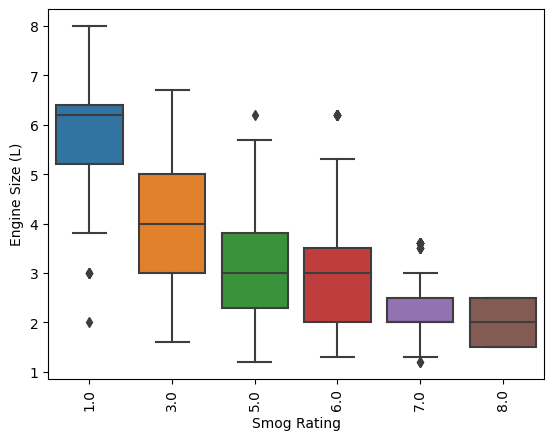

In [28]:
sns.boxplot(x = dp['Smog Rating'], y = dp['Engine Size (L)'])
plt.xticks(rotation = 90)
plt.show()

In [29]:
dp.head(4)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0


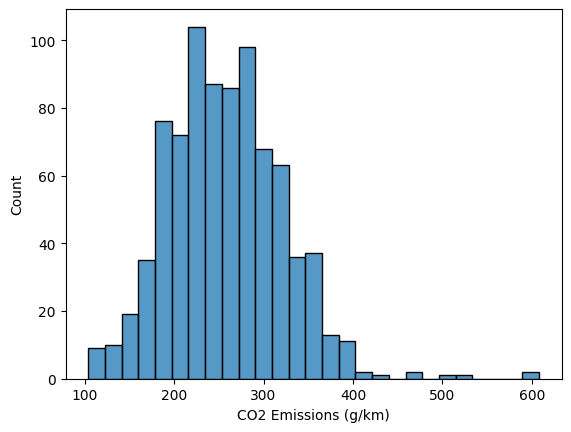

In [30]:
sns.histplot(dp['CO2 Emissions (g/km)'])
plt.show()

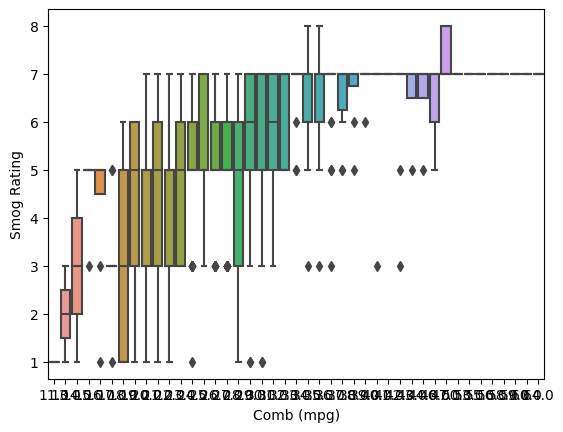

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

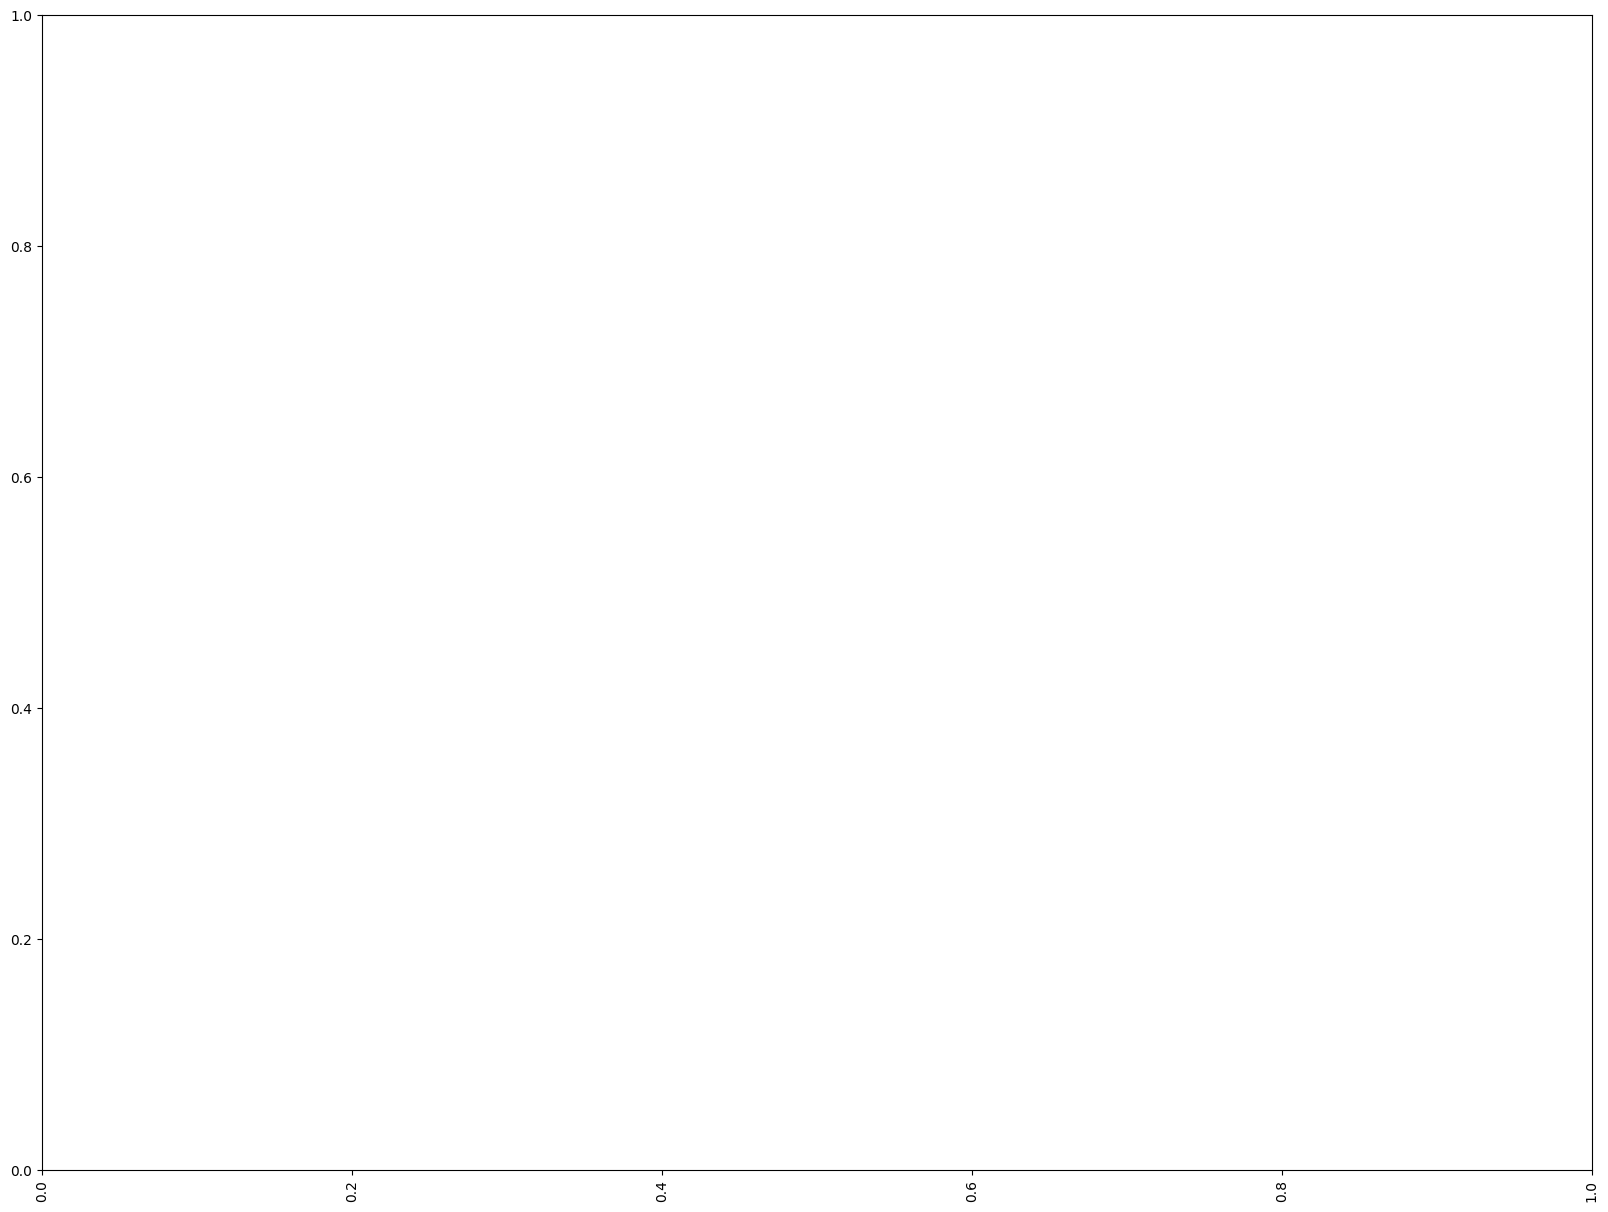

In [31]:
sns.boxplot(x = dp['Comb (mpg)'], y = dp['Smog Rating'])
plt.show()
plt.figure(figsize = (20,15))
plt.xticks(rotation = 90)

In [32]:
dp.head(3)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0


In [33]:
dp['Cylinders'].value_counts()

4.0     366
6.0     247
8.0     169
3.0      24
12.0     15
10.0      9
16.0      3
Name: Cylinders, dtype: int64

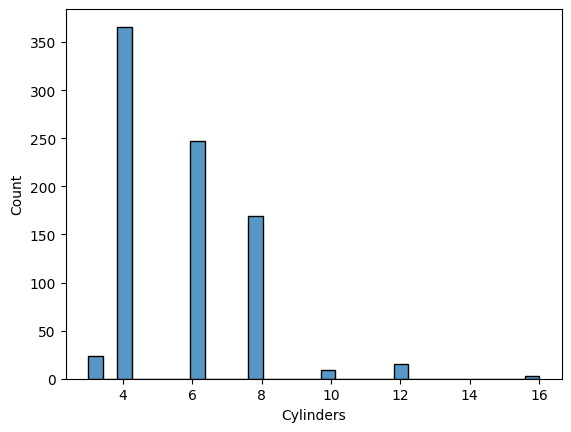

In [34]:
sns.histplot(dp['Cylinders'])
plt.show()

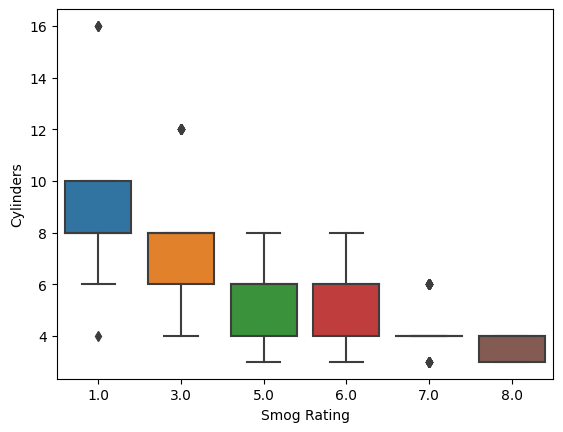

In [35]:
sns.boxplot(x = dp["Smog Rating"], y = dp["Cylinders"])
plt.show()

In [36]:
dp["Cylinders"].nunique()

7

In [37]:
dp["Smog Rating"].nunique()

6

<Axes: xlabel='Cylinders', ylabel='Engine Size (L)'>

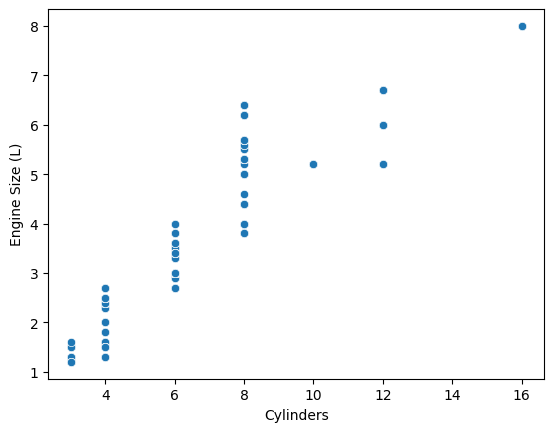

In [38]:
sns.scatterplot(x=dp["Cylinders"],y=dp["Engine Size (L)"])

In [39]:
dp.head(4)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0


In [40]:
dp["Model"].nunique()

657

<Axes: xlabel='Smog Rating', ylabel='Count'>

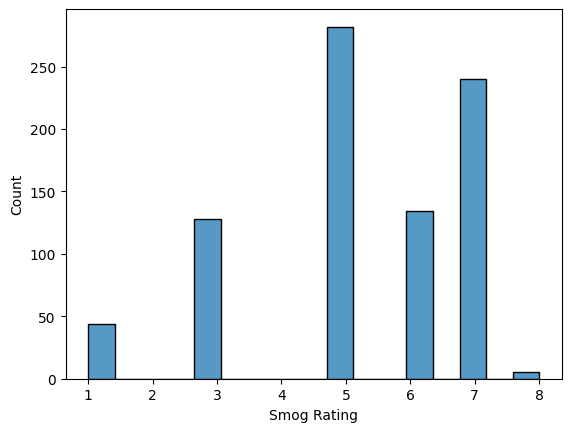

In [41]:
sns.histplot(dp["Smog Rating"])

In [42]:
dp.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

## Correlation Differentiating :-

<Axes: >

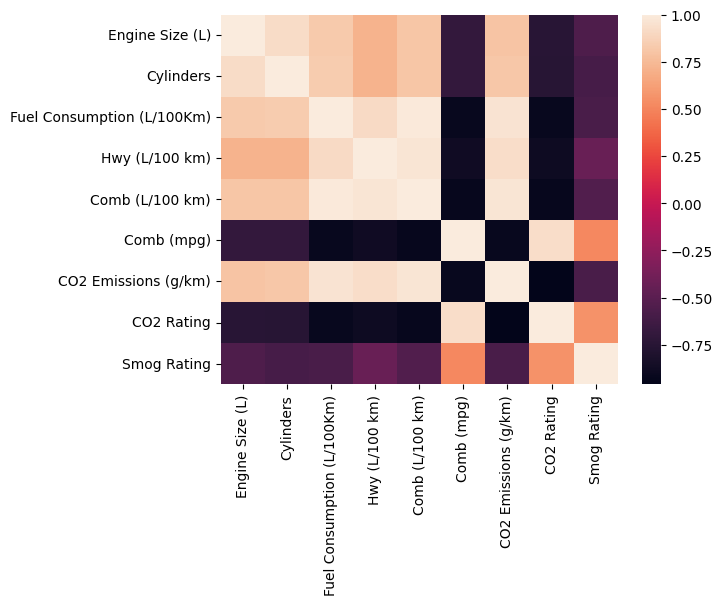

In [43]:
sns.heatmap(dp.drop(["Year","Make","Model","Vehicle Class","Transmission","Fuel Type"], axis = 1).corr())

### Model Building :-

In [44]:
dp.head(3)

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0


In [45]:
dp.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [46]:
dp.drop(['Year','Make','Model','Vehicle Class','Transmission','Fuel Type'], axis = 1, inplace =True)

In [47]:
dp.columns

Index(['Engine Size (L)', 'Cylinders', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [48]:
dp.head(3)

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,1.5,4.0,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,1.5,4.0,8.9,6.5,7.8,36.0,181.0,6.0,6.0


In [49]:
features = ['Engine Size (L)', 'Cylinders', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating']

x = dp[features]

In [50]:
y = dp["Smog Rating"]

In [51]:
x

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating
0,1.5,4.0,7.9,6.3,7.2,39.0,167.0,6.0
1,1.5,4.0,8.1,6.5,7.4,38.0,172.0,6.0
2,1.5,4.0,8.9,6.5,7.8,36.0,181.0,6.0
3,3.5,6.0,12.6,9.4,11.2,25.0,263.0,4.0
4,3.0,6.0,13.8,11.2,12.4,23.0,291.0,4.0
...,...,...,...,...,...,...,...,...
828,2.0,4.0,10.2,7.9,9.2,31.0,215.0,5.0
829,2.0,4.0,10.3,8.2,9.4,30.0,218.0,5.0
830,2.0,4.0,11.1,8.7,10.0,28.0,233.0,5.0
831,2.0,4.0,10.5,8.4,9.6,29.0,223.0,5.0


In [52]:
y

0      7.0
1      7.0
2      6.0
3      5.0
4      5.0
      ... 
828    5.0
829    5.0
830    7.0
831    5.0
832    7.0
Name: Smog Rating, Length: 833, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [54]:
x_train

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating
751,2.4,4.0,10.6,8.1,9.5,30.0,221.0,5.0
592,2.5,4.0,8.8,6.6,7.9,36.0,185.0,6.0
45,5.2,10.0,16.6,10.2,13.7,21.0,320.0,3.0
757,4.0,6.0,14.8,12.5,13.8,20.0,320.0,3.0
382,3.0,6.0,11.2,8.7,10.1,28.0,272.0,4.0
...,...,...,...,...,...,...,...,...
763,2.5,4.0,5.3,5.0,5.1,55.0,121.0,8.0
192,2.7,4.0,13.8,13.2,13.6,21.0,318.0,3.0
629,2.0,4.0,10.7,7.6,9.3,30.0,218.0,5.0
559,2.0,4.0,11.6,9.4,10.6,27.0,249.0,5.0


In [55]:
x_test

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating
713,3.0,6.0,12.3,8.6,10.6,27.0,249.0,5.0
686,2.0,4.0,10.0,8.1,9.1,31.0,213.0,5.0
31,3.0,6.0,11.1,7.8,9.6,29.0,224.0,5.0
674,2.0,4.0,9.7,7.2,8.5,33.0,199.0,6.0
412,2.0,4.0,12.1,7.9,10.2,28.0,241.0,5.0
...,...,...,...,...,...,...,...,...
242,6.2,8.0,19.0,11.5,15.6,18.0,368.0,2.0
401,2.0,4.0,9.1,7.4,8.3,34.0,194.0,6.0
378,5.3,8.0,15.8,11.8,14.0,20.0,327.0,3.0
170,6.2,8.0,14.6,8.9,12.0,24.0,281.0,4.0


In [56]:
y_train

751    6.0
592    7.0
45     1.0
757    5.0
382    3.0
      ... 
763    7.0
192    7.0
629    6.0
559    6.0
684    6.0
Name: Smog Rating, Length: 583, dtype: float64

In [57]:
y_test

713    5.0
686    5.0
31     5.0
674    7.0
412    3.0
      ... 
242    1.0
401    7.0
378    6.0
170    1.0
187    5.0
Name: Smog Rating, Length: 250, dtype: float64

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
Humama = LinearRegression()

In [60]:
Humama.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = Humama.predict(x_test)

In [62]:
y_pred

array([5.04458653, 6.17867422, 5.27      , 6.06433559, 5.22598341,
       6.0711264 , 5.96205221, 6.96577115, 5.80700664, 6.2283122 ,
       5.6523876 , 5.65677618, 6.46411147, 5.65253946, 6.31473572,
       6.41899085, 5.62047015, 5.13193355, 5.96568555, 5.02200557,
       4.9559992 , 5.8192571 , 5.83549135, 6.05443531, 6.5303777 ,
       2.1074618 , 4.82799275, 5.41084263, 3.46841735, 5.37411915,
       6.04570039, 6.45578026, 3.54091754, 5.87176478, 3.85016081,
       3.85281415, 5.4776263 , 5.99637558, 5.2789066 , 5.23922844,
       6.26082706, 5.38431082, 5.62846057, 4.82799275, 5.93777473,
       1.45826939, 5.023572  , 5.93958059, 3.85281415, 5.44573947,
       4.36104481, 5.59519315, 3.00717482, 5.52401289, 6.29366595,
       5.9335675 , 6.09050597, 5.99242981, 3.5805825 , 6.09686207,
       6.43713872, 3.92178154, 5.04811829, 4.44906584, 5.56821114,
       3.36455929, 7.29470934, 5.68407837, 4.70346246, 4.84840601,
       4.87263125, 6.01678883, 5.4044305 , 5.04318674, 4.60658

In [63]:
y_test

713    5.0
686    5.0
31     5.0
674    7.0
412    3.0
      ... 
242    1.0
401    7.0
378    6.0
170    1.0
187    5.0
Name: Smog Rating, Length: 250, dtype: float64

### Finally Evaluating the Models :-

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
print('MAE', mean_absolute_error(y_test,y_pred))

MAE 1.0024839192971362


In [66]:
print('MSE', mean_squared_error(y_test, y_pred))

MSE 1.6677566327336053


In [67]:
from math import sqrt as sqrt
print('RMSE',sqrt(mean_absolute_error(y_test,y_pred)))

RMSE 1.0012411893730382


In [68]:
r2=r2_score(y_test,y_pred)*100

In [69]:
r2

43.833264425856996

In [70]:
## Only the REsult is carried as 43 % , which will be considered as low , and the model is not fit for the modelling part.